In [1060]:
selector = 4
dataset = [ 'faceshifter_c23_100',    # 0 — OK
            'faceshifter_raw_100',    # 1 — OK
            'faceshifter_raw_200',    # 2 — OK
            
            'neuraltextures_c23_100', # 3 — IMBALANCE
            'neuraltextures_raw_100', # 4 — IMBALANCE
           ]

# video statistics (e.g. FPS per video)
path_video_stats_manipulated = '2_rPPG/'+dataset[selector]+'/stats/video_statistics_manipulated.csv'
path_video_stats_original = '2_rPPG/'+dataset[selector]+'/stats/video_statistics_original.csv'

# GRGB folders
path_GRGB_manipulated = '2_rPPG/'+dataset[selector]+'/manipulated'
path_GRGB_original = '2_rPPG/'+dataset[selector]+'/original'

import matplotlib.pyplot as plt
import pandas as pd

In [1061]:
df = pd.read_csv(path_video_stats_manipulated)
duration_manipulated = df['Duration']

# calculate descriptive statistics
mean_duration = duration_manipulated.mean()
std_duration = duration_manipulated.std()
min_duration = duration_manipulated.min()
max_duration = duration_manipulated.max()
median_duration = duration_manipulated.median()
quantiles = duration_manipulated.quantile([0.25, 0.5, 0.75])  # 25th, 50th, 75th percentiles
range_duration = max_duration - min_duration

print('MANIPULATED')
print(f"Mean Duration: {mean_duration}")
print(f"Standard Deviation: {std_duration}")
print(f"Minimum Duration: {min_duration}")
print(f"Maximum Duration: {max_duration}")
print(f"Median Duration: {median_duration}")
print(f"Range of Duration: {range_duration}")
print(f"25th Percentile: {quantiles[0.25]}")
print(f"50th Percentile (Median): {quantiles[0.5]}")
print(f"75th Percentile: {quantiles[0.75]}")


MANIPULATED
Mean Duration: 15.031733333333333
Standard Deviation: 4.411916230114622
Minimum Duration: 9.566666666666666
Maximum Duration: 30.52
Median Duration: 13.683333333333334
Range of Duration: 20.953333333333333
25th Percentile: 11.966666666666669
50th Percentile (Median): 13.683333333333334
75th Percentile: 17.2


In [1062]:
pd.set_option('display.max_rows', None)  # None removes the limit
df_sorted_manipulated = df.sort_values(by='Duration')
#print(df_sorted_manipulated[['Filename', 'Duration']])

In [1063]:
df = pd.read_csv(path_video_stats_original)
duration_original = df['Duration']

# calculate descriptive statistics
mean_duration = duration_original.mean()
std_duration = duration_original.std()
min_duration = duration_original.min()
max_duration = duration_original.max()
median_duration = duration_original.median()
quantiles = duration_original.quantile([0.25, 0.5, 0.75])  # 25th, 50th, 75th percentiles
range_duration = max_duration - min_duration

print('ORIGINAL')
print(f"Mean Duration: {mean_duration}")
print(f"Standard Deviation: {std_duration}")
print(f"Minimum Duration: {min_duration}")
print(f"Maximum Duration: {max_duration}")
print(f"Median Duration: {median_duration}")
print(f"Range of Duration: {range_duration}")
print(f"25th Percentile: {quantiles[0.25]}")
print(f"50th Percentile (Median): {quantiles[0.5]}")
print(f"75th Percentile: {quantiles[0.75]}")


ORIGINAL
Mean Duration: 19.286666666666665
Standard Deviation: 8.270401187516187
Minimum Duration: 9.566666666666666
Maximum Duration: 49.92
Median Duration: 17.053333333333335
Range of Duration: 40.35333333333334
25th Percentile: 13.306666666666667
50th Percentile (Median): 17.053333333333335
75th Percentile: 22.349999999999998


In [1064]:
pd.set_option('display.max_rows', None)  # None removes the limit
df_sorted_original = df.sort_values(by='Duration')

df_sorted_manipulated['Filename'] = df_sorted_manipulated['Filename'].astype(str)
df_sorted_original['Filename'] = df_sorted_original['Filename'].astype(str).str.zfill(3) # keep leading zeros
df_sorted_manipulated = df_sorted_manipulated[['Filename', 'Duration']]
df_sorted_original = df_sorted_original[['Filename', 'Duration']]

df_sorted_manipulated = df_sorted_manipulated.reset_index(drop=True)
df_sorted_original = df_sorted_original.reset_index(drop=True)

df_combined = pd.concat([df_sorted_manipulated, df_sorted_original], axis=1, keys=['Manipulated', 'Original'])
print(df_combined)


   Manipulated            Original           
      Filename   Duration Filename   Duration
0      134_192   9.566667      192   9.566667
1      192_134   9.566667      241   9.733333
2      210_241   9.733333      263  10.000000
3      241_210   9.733333      683  10.066667
4      284_263  10.000000      441  10.166667
5      263_284  10.000000      677  10.466667
6      683_607  10.066667      272  10.766667
7      607_683  10.066667      044  11.166667
8      441_439  10.166667      529  11.166667
9      439_441  10.166667      434  11.233333
10     677_671  10.466667      671  11.433333
11     671_677  10.466667      134  11.533333
12     396_272  10.766667      572  11.566667
13     272_396  10.766667      109  11.920000
14     529_633  11.166667      585  11.966667
15     633_529  11.166667      904  11.966667
16     945_044  11.166667      779  12.240000
17     044_945  11.166667      994  12.640000
18     434_438  11.233333      974  12.720000
19     438_434  11.233333      828

In [1065]:
print(len(duration_original),len(duration_manipulated))

100 100


In [1066]:
# Filter for the specific filename
filename_to_search = '134'
duration_for_filename = df_sorted_original[df_sorted_original['Filename'] == filename_to_search]['Duration']

print(f"Duration for filename '{filename_to_search}':")
print(duration_for_filename.to_string(index=False))

Duration for filename '134':
11.533333


In [1067]:
# Filter for filenames starting with '052_'
filename_prefix = '192'
filtered_df = df_sorted_manipulated[df_sorted_manipulated['Filename'].str.startswith(filename_prefix)]

print(f"Durations for filenames starting with '{filename_prefix}':")
print(filtered_df[['Filename', 'Duration']])

Durations for filenames starting with '192':
  Filename  Duration
1  192_134  9.566667


In [1068]:
''' 
neuraltextures_c23_100

target_source

027_009      10.5
027          10.5           √

009_027      10.5
009          19.6           X

—————————

054_071      12.266667
054          12.266667      √

071_054      12.266667      
071          15.1           X

= they are taking the min duration of the target/source files


====================
faceshifter_raw_100

target_source

134_192  11.533333
134      11.533333          √

192_134  9.566667
192      9.566667           √

= they are taking the duration of the target file


'''

' \nneuraltextures_c23_100\n\ntarget_source\n\n027_009      10.5\n027          10.5           √\n\n009_027      10.5\n009          19.6           X\n\n—————————\n\n054_071      12.266667\n054          12.266667      √\n\n071_054      12.266667      \n071          15.1           X\n\n= they are taking the min duration of the target/source files\n\n\n====================\nfaceshifter_raw_100\n\ntarget_source\n\n134_192  11.533333\n134      11.533333          √\n\n192_134  9.566667\n192      9.566667           √\n\n= they are taking the duration of the target file\n\n\n'

In [1069]:
# bin_size = 20
# bin_range = (0, 50)
# bins = 20 
# plt.hist(duration_original, color='blue', bins=bins, range=bin_range, alpha=0.3, hatch='////',label='original',edgecolor='blue', linewidth=0)  # original
# plt.hist(duration_manipulated, color='red', bins=bins, range=bin_range, alpha=0.4,hatch='\\\\\\', label='manipulated',edgecolor='red',linewidth=0)  # manipulated
# plt.title(f'Durations ({dataset[selector]})')
# plt.xlabel('Duration')
# plt.ylabel('Amount of Videos')
# plt.legend()
# plt.show()


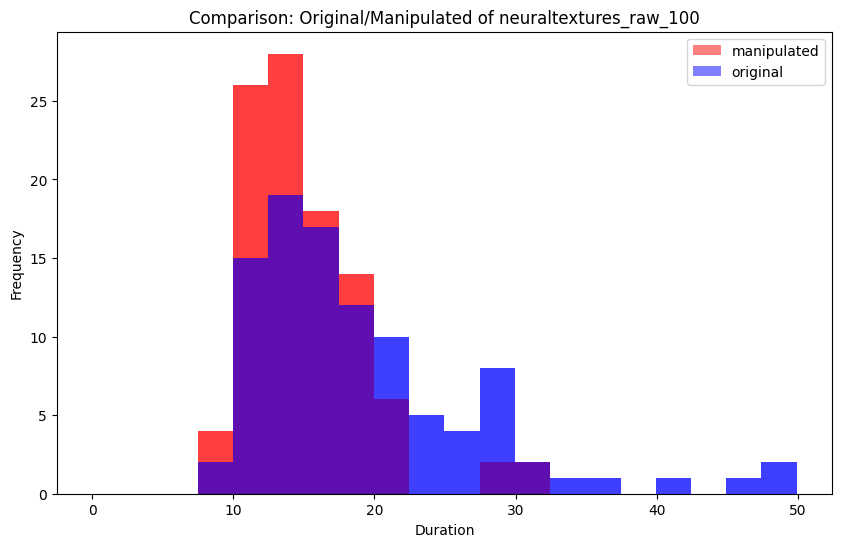

In [1070]:
import matplotlib.pyplot as plt

# Step 1: Define the common bin range
bin_range = (0, duration_original.max())  # Assuming both datasets range from 0 to 50
bins = 20  # Define the number of bins (you can adjust this)

plt.figure(figsize=(10, 6))
plt.hist(duration_manipulated, bins=bins, range=bin_range, alpha=0.5, label='manipulated', color='red')
plt.hist(duration_original, bins=bins, range=bin_range, alpha=0.5, label='original', color='blue')
plt.hist(duration_manipulated, bins=bins, range=bin_range, alpha=0.5, color='red')
plt.hist(duration_original, bins=bins, range=bin_range, alpha=0.5, color='blue')
# plt.hist(duration_manipulated, bins=bins, range=bin_range, alpha=0.5, label='manipulated', color='red', edgecolor='red',hatch='\\\\\\',linewidth=0)
# plt.hist(duration_original, bins=bins, range=bin_range, alpha=0.5, label='original', color='blue', edgecolor='blue',hatch='////',linewidth=0)

plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title(f'Comparison: Original/Manipulated of {dataset[selector]}')
plt.legend()
plt.show()


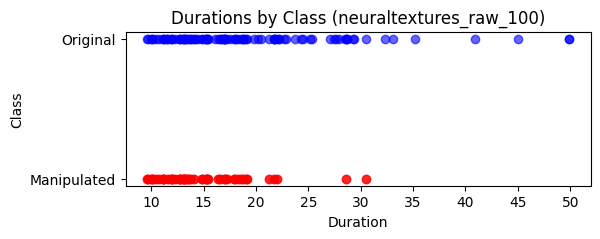

In [1071]:
plt.figure(figsize=(6, 2)) 
y_original = [1] * len(duration_original)  # all original points will be at y = 1
y_manipulated = [0] * len(duration_manipulated)  # all manipulated points will be at y = 0

plt.scatter(duration_original, y_original, color='blue', alpha=0.6, label='Original', edgecolors='blue')
plt.scatter(duration_manipulated, y_manipulated, color='red', alpha=0.6, label='Manipulated', edgecolors='red')

plt.title(f'Durations by Class ({dataset[selector]})')
plt.xlabel('Duration')
plt.ylabel('Class')
plt.yticks([0, 1], ['Manipulated', 'Original'])
plt.show()
